In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('https://github.com/fedhere/PUI2017_fb55/raw/master/HW5_fb55/'+
               'World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv')

In [3]:
pop = pd.read_csv('https://github.com/geeroovaa/PUI2017_grv232/raw/master/HW5_grv232/POP.csv',
                  skiprows = [0,1,2,3],usecols=['Country Name','2012'])

In [4]:
gdp = pd.read_csv('https://github.com/geeroovaa/PUI2017_grv232/raw/master/HW5_grv232/GDP.csv', 
                  skiprows = [0,1,2,3],usecols=['Country Name','2012'])

In [5]:
ms = pd.read_csv('https://github.com/geeroovaa/PUI2017_grv232/raw/master/HW5_grv232/mass.csv')

In [6]:
df=df.rename(index=str, columns={"Country/Territory": "Country"})

In [7]:
pop=pop.rename(index=str, columns={"Country Name": "Country",'2012':'pop'})

In [8]:
gdp=gdp.rename(index=str, columns={"Country Name": "Country",'2012':'gdp'})

In [9]:
df= df.merge(pop, left_on="Country", right_on="Country")

In [10]:
df= df.merge(gdp, left_on="Country", right_on="Country")

In [14]:
df= df.merge(ms, left_on="Country", right_on="Country")

In [29]:
df_=df

In [31]:
df_

,Country,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,pop,gdp,Guns/100 inhabitants,Number of mass shootings
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,22728254.0,1.538194e+12,15.0,4
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,8429991.0,4.074516e+11,30.4,1
2,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,34750545.0,1.824289e+12,30.8,4
3,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,5591572.0,3.271489e+11,12.0,0
4,Finland,FI,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,5413971.0,2.567065e+11,45.3,2
5,France,FR,WHO-MDB,9.6,35.0,0.06,12.0,31.2,19000000.0,65659790.0,2.681416e+12,31.2,6
6,Germany,DE,CTS/National police,26.3,158.0,0.19,15.0,30.3,25000000.0,80425823.0,3.543984e+12,30.3,7
7,Greece,GR,WHO-MDB,34.9,29.0,0.26,23.0,22.5,2500000.0,11045011.0,2.456707e+11,22.5,0
8,Hungary,HU,CTS,5.0,7.0,0.07,93.0,5.5,560000.0,9920362.0,1.273211e+11,5.5,0
9,Iceland,IS,CTS,0.0,0.0,0.00,15.0,30.3,90000.0,320716.0,1.421858e+10,30.3,0


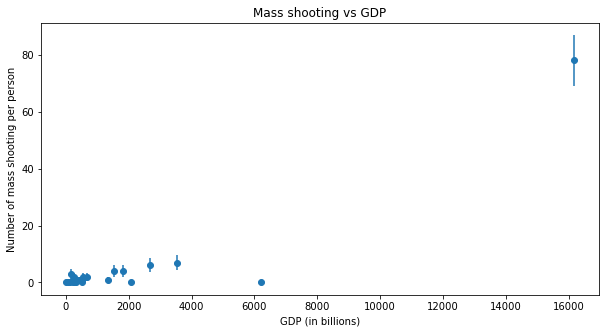

In [118]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
ax.set_title('Mass shooting vs GDP')
pl.show()

In [32]:
df_['gdppp']=df_['gdp']/df_['pop']

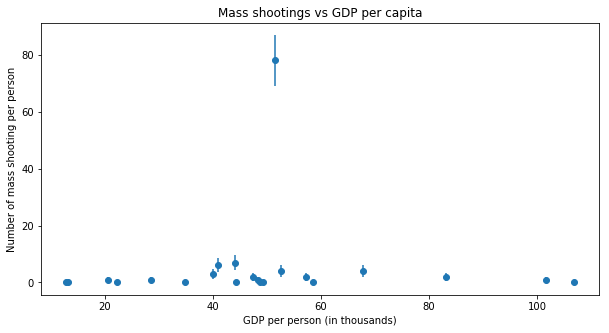

In [116]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdppp / 1e3, df_['Number of mass shootings'])
ax.errorbar(df_.gdppp / 1e3, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP per person (in thousands)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
ax.set_title('Mass shootings vs GDP per capita')
pl.show()

In [41]:
df_['Average civilian firearms pp'] = df_["Average total all civilian firearms"] / df_['pop']

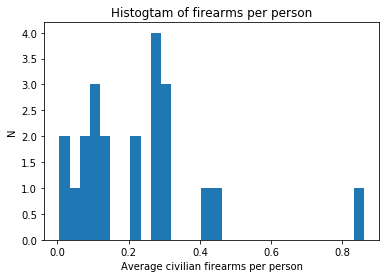

In [115]:
fig, ax = plt.subplots()
ax.hist(df_['Average civilian firearms pp'],bins=30)
ax.set_xlabel('Average civilian firearms per person')
ax.set_ylabel('N');
ax.set_title('Histogtam of firearms per person')

In [52]:
df_['Homicides pfpp']=1e6*df_['Number of homicides by firearm']/df_['pop']

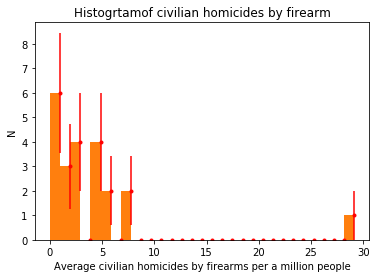

In [114]:
fig, ax = plt.subplots()
ax.hist(df_['Homicides pfpp'],bins=30,color='y')
ax.set_xlabel('Average civilian homicides by firearms per a million people')
ax.set_ylabel('N')
y=hist(df_['Homicides pfpp'],bins=30)[0]
x=hist(df_['Homicides pfpp'],bins=30)[1]
ax.errorbar(x[-30:],y,yerr=np.sqrt(y)*1,fmt = '.',color='r')
ax.set_title('Histogrtamof civilian homicides by firearm');

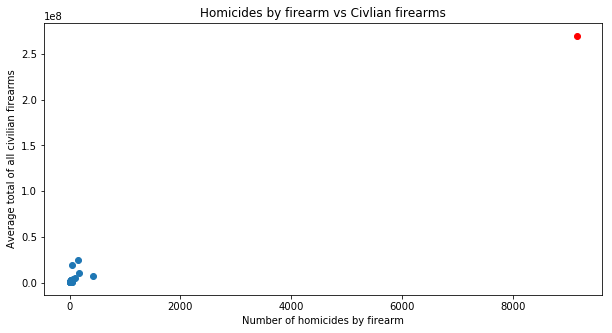

In [113]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.loc[0:20, 'Number of homicides by firearm'], df_.loc[0:20,'Average total all civilian firearms'])
scatter = ax.scatter(df_.loc[21,'Number of homicides by firearm'], df_.loc[21,'Average total all civilian firearms'], color = 'r', label='United States')
ax.set_xlabel("Number of homicides by firearm")
ax.set_ylabel("Average total of all civilian firearms")
ax.set_title('Homicides by firearm vs Civlian firearms')
ax.set_ylim()
pl.show()